# Import the neccessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow.keras
import cv2
import os
import glob
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

Init Plugin
Init Graph Optimizer
Init Kernel


# Reading images data

In [2]:
dir_path #Directory to the data
categories = ['rock', 'paper', 'scissors', 'replay', 'none']
image_data = []
for cat in categories:
    path = os.path.join(dir_path, cat)
    for img in glob.glob(path + "/*.jpg"):
        img_arr = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (227, 227))
        image_data.append([img_arr, categories.index(cat)])

- Define the directory path where the data are stored.
- The data contains 5 classes:
    - rock - hand command rock symbol
    - paper - hand command paper symbol
    - scissors - hand command paper symbol
    - replay - hand command to replay
    - none - random noise
- The dataset is separated into sub-folders for each class. So, each image can be easily read and assign label/class to it.
- Read image data using opencv, resize it to an appropriate size (227,227), and then assign the class to it using the index of the folder that it's in.

- Shuffle the image data, so we can take a look at the image for different class
- Separate the image data into input_data and the label
- Plot the first 9 images

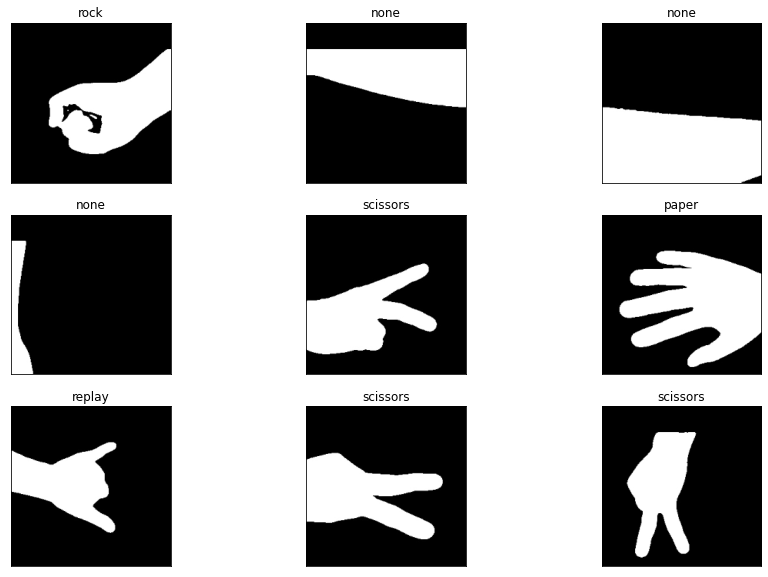

In [4]:
random.shuffle(image_data)
input_data = []
label = []

for X, y in image_data:
    input_data.append(X)
    label.append(y)

plt.figure(1, figsize=(15, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]])
plt.show()

In [5]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data / 255.0

label = utils.to_categorical(label, num_classes=len(categories), dtype='i1')
input_data.shape = (-1, 227, 227, 1)


X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.2, random_state=0)


- Convert the both the input data and the label data into numpy array
- Create one-hot encoding for the label
- Reshape the input data
- Use sklearn to split the input and the label into training and test set

- Instantiate the model
- Adding 1 convoluted layer with the rectified linear unit activation function, and 1 max pooling layer with the drop out proportion of 30%
- Add 1 dense layer with 454 nodes and rectified linear unit activation function
- Add 1 output layer with 5 nodes (associated with 5 classes) and softmax activation function (multi-class classification)
- Compile the model using categorical-entropy loss, rmsprop optimizer and accuracy metrics
- Fit the model with the training set for 5 epochs, and validation split of 30%

In [6]:
model = tensorflow.keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(227, 227, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(454, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.3)

2022-04-13 10:13:44.112926: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-13 10:13:44.113655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


2022-04-13 10:13:45.678316: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-13 10:13:45.680788: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-13 10:13:45.860051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/5
88/88 [==============================] - ETA: 0s - loss: 6.6499 - accuracy: 0.7261

2022-04-13 10:14:19.292086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 40s 440ms/step - loss: 6.6499 - accuracy: 0.7261 - val_loss: 0.1303 - val_accuracy: 0.9530
Epoch 2/5
88/88 [==============================] - 38s 431ms/step - loss: 0.1204 - accuracy: 0.9765 - val_loss: 0.0118 - val_accuracy: 0.9971
Epoch 3/5
88/88 [==============================] - 39s 440ms/step - loss: 0.1209 - accuracy: 0.9859 - val_loss: 0.0066 - val_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 39s 442ms/step - loss: 0.0811 - accuracy: 0.9902 - val_loss: 0.0068 - val_accuracy: 0.9979
Epoch 5/5
88/88 [==============================] - 38s 432ms/step - loss: 1.6284e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9979


The model perform very well with the accuracy of ~100%.
Print the loss and accuracy curve for all epochs to verify that the model is neither overfiting nor underfiting

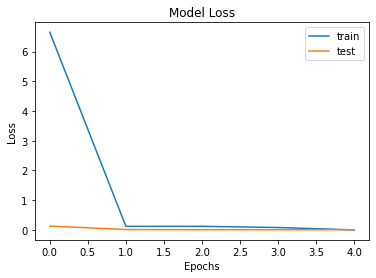

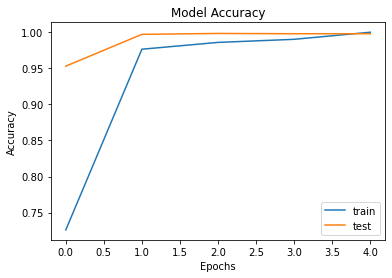

In [7]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

The model accuracy converges at 4 epochs, thus this show that the model performance is good and not underfiting nor overfitting

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy * 100))

63/63 [==============================] - 11s 168ms/step - loss: 0.0026 - accuracy: 0.9995
Test accuracy: 99.95%


Even with the test set, the model is at 99.95% accuracy with the loss of 0.0026
Let further verified it with the confusion matrix

2022-04-13 10:28:59.020507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


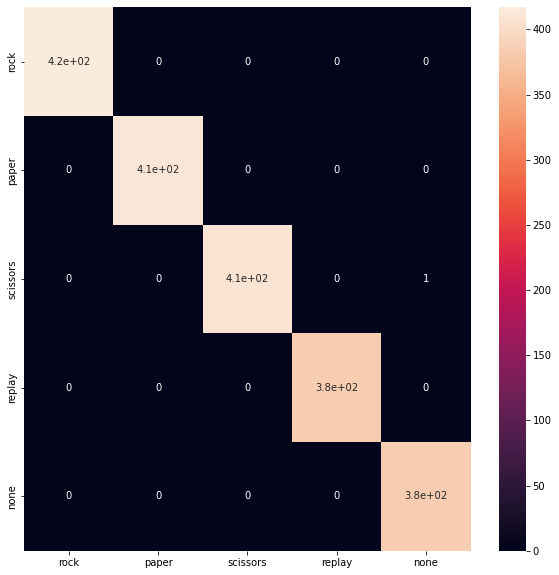

In [9]:
cat = [c for c in categories]
plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sns.heatmap(cm, annot=True, xticklabels=cat, yticklabels=cat)
plt.show()

It is very clear that the model is very good at predicting the test set, with all the numbers lay in the diagonal line with only 1 image for none classified as scissors